The general idea behind boosting methods is to train predictors sequentially, each trying to correct its previous one..

<img src='images/boosting.png'>

The basic concept behind Adaboost is to set the weights of classifiers and training the data sample in each iteration such that it ensures the accurate predictions of unusual observations. Any machine learning algorithm can be used as base classifier if it accepts weights on the training set

 we’ll be using a dataset that categories people as attractive or not based on certain features.

source:towardsdatascience.com

<img src='images/b1.png' width='60%' height='60%'/>

### Initialize the sample weights

Initially, all the samples have identical weights (1 divided by the total number of samples).

<img src='images/b2.png' width='60%' height='60%'/>

**Build a decision tree with each feature(which is also called stumps), classify the data and evaluate the result**

Next, for each feature, we build a decision tree with a depth of 1. Then, we use every decision tree to classify the data. Afterwards, we compare the predictions made by each tree with the actual labels in the training set. The feature and corresponding tree that did the best job of classifying the training samples becomes the next tree in the forest.

we will select one of those trees on the basis of low entropy/gini index

<img src='images/b3.png'/>

The decision tree incorrectly classified 1 person as being attractive based off the fact that they were smart. We repeat the process for all trees and select the one with the smallest number of incorrect predictions.

**Next find the total error is the sum of the weights of the incorrectly classified samples.**

<img src='images/b4.png' width='40%' height='40%'/>

### find the performance of the stump

<img src='images/b5.png' width='60%' height='60%'/>

<img src='images/b6.png' width='60%' height='60%'/>

this no we will use later

Update the sample weights so that the next decision tree will take the errors made by the previous decision tree into account

We look at the samples that the current tree classified incorrectly and increase their associated weights using the following formula.

<img src='images/b7.png' width='60%' height='60%'/>

<img src='images/b8.png' width='60%' height='60%'/>

Then, we look at the samples that the tree classified correctly and decrease their associated weights using the following formula.

<img src='images/b9.png' width='60%' height='60%'/>

The equation is the same as before only this time, we raise e to the power of a negative exponent.

<img src='images/b10.png' width='60%' height='60%'/>

The samples which the previous stump incorrectly classified should be associated with larger sample weights and the ones it classified correctly should be associated with smaller sample weights.

how if we summed all the sample weights, we’d not get a number that is equal to 1 . Thus, we normalize the new sample weights so that they add up to 1.


<img src='images/b11.png' width='60%' height='60%'/>

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics

<frozen importlib._bootstrap>:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject


In [2]:
digits = datasets.load_digits()
x = digits.data
y = digits.target

In [3]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                                   test_size=.20,
                                                   random_state=10)

Let's create the AdaBoost Model using scikit-learn,

AdaBoost uses Decision Tree as default base classifier

In [4]:
from sklearn.ensemble import AdaBoostClassifier

In [5]:
ada = AdaBoostClassifier(n_estimators=50)
model = ada.fit(x_train, y_train)

In [8]:
tpred = model.predict(x_train)
pred = model.predict(x_test)

In [9]:
print("Training Score: ", metrics.accuracy_score(y_train, tpred))
print("Testing Score: ", metrics.accuracy_score(y_test, pred))

Training Score:  0.2929714683368128
Testing Score:  0.2972222222222222


### Hyperparameters in AdBoost

- base_estimator: it is a weak learner used to train the model. It uses DecisonTreeClassifier as default weak learner for training purpose.  We can also specify different ML algorithms.

- n_estimators: Number of weak learners to train iteratively

- learning_rate: It contributes to the weights of weak learners. It uses 1 as default value

### USING DIFFERENT BASE LEARNERS

In [10]:
from sklearn.svm import SVC

In [11]:
sv = SVC(probability=True, kernel='linear')

In [12]:
abc = AdaBoostClassifier(n_estimators=50,
                        base_estimator=sv)

In [13]:
abc

AdaBoostClassifier(base_estimator=SVC(kernel='linear', probability=True))

In [17]:
model1=abc.fit(x_train, y_train)

In [18]:
tr_pred = model1.predict(x_train)
ts_pred = model1.predict(x_test)

In [19]:
print("Training Score: ", metrics.accuracy_score(y_train, tr_pred))
print("Testing Score: ", metrics.accuracy_score(y_test, ts_pred))

Training Score:  0.9909533750869868
Testing Score:  0.9472222222222222


### Examining the results

In [20]:
import matplotlib.pyplot as plt

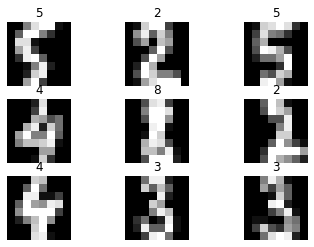

In [29]:
for i,s in enumerate(x_test[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(s.reshape(8,8), cmap='gray')
    plt.title(ts_pred[i])
    plt.axis('off')

TASK

Create predictive model using GradientBoostingClassifier